# Reference 
https://www.kaggle.com/bittlingmayer/amazonreviews/home <br>
http://blog.conceptnet.io/posts/2017/how-to-make-a-racist-ai-without-really-trying/<br>
http://mlg.ucd.ie/datasets/bbc.html<br>
https://en.wikipedia.org/wiki/Sentiment_analysis<br>
https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/<br>
https://skymind.ai/wiki/bagofwords-tf-idf<br>
https://www.tensorflow.org/tutorials/representation/word2vec<br>
https://skymind.ai/wiki/word2vec<br>
http://ruder.io/word-embeddings-1/<br>
Mikolov, T., Corrado, G., Chen, K., & Dean, J. (2013). Efficient Estimation of Word Representations in Vector Space. Proceedings of the International Conference on Learning Representations (ICLR 2013), 1–12. ↩︎

Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Distributed Representations of Words and Phrases and their Compositionality. NIPS, 1–9. ↩︎

# EMIS/CSE 8331: Data Mining, Spring 2019
# Hands on sentiment analysis 
## Present by Xingming Qu


# What is Sentiment Analysis

Sentiment analysis is ubiquitous, and it is a classification technique based on natural language processing. The main problem to be solved is to judge whether a sentence (or an article) is positive or negative. 
##  Why we need Sentiment Analysis
Dealing with sentiment analysis can greatly improve people's understanding of things, and can also use the conclusions of sentiment analysis to serve other people or things. 



## In this tutorial, we will mainly focus on
###  +Prepare Text Data for Deep Learning with Keras
    1. Tokenize Words 
    2. The feature of the document
    3. Word Embedding.
### +Semantic analysis based on dictionary (old way).
### +Semantic analysis based on deep learning
    1. Sequence processing with RNN(LSTM) 
    2. Sequence processing with CNN

### OK! Let's start our tutorial!

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


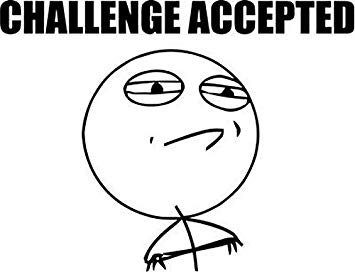

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input, Conv1D, GlobalMaxPool1D, Dropout, concatenate, Layer, InputSpec, CuDNNLSTM
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import activations, initializers, regularizers, constraints
from keras.utils.conv_utils import conv_output_length
from keras.regularizers import l2
from keras.constraints import maxnorm
import numpy as np
import pandas as pd
import os,shutil
import warnings
Image("img/ca.jpg", width=400, height=400)

# 1.Prepare Text Data for Deep Learning with Keras
## 1.1 Tokenize Words
Tokenization is a way to split text into tokens. These tokens could be paragraphs, sentences, individual words or even characters. 
Most of the time we use split text into words

In [42]:
docs = [' test Tokenize Words!',
        ' test This is the corpus~~~~~',
        'test Use Kears Tokenize?!@#',
        'test test test test...',
        '  ']

from keras.preprocessing.text import Tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [43]:
# Once fit, the Tokenizer provides 4 attributes 
# that you can use to query what has been learned about your documents:
print(t.word_counts)  # A dictionary of words and their counts.
print(t.document_count) #  A dictionary of words and how many documents each appeared in.
print(t.word_index)  #  A dictionary of words and their uniquely assigned integers.
print(t.word_docs)  # An integer count of the total number of documents that were used to fit the Tokenizer.

OrderedDict([('test', 7), ('tokenize', 2), ('words', 1), ('this', 1), ('is', 1), ('the', 1), ('corpus', 1), ('use', 1), ('kears', 1)])
5
{'test': 1, 'tokenize': 2, 'words': 3, 'this': 4, 'is': 5, 'the': 6, 'corpus': 7, 'use': 8, 'kears': 9}
defaultdict(<class 'int'>, {'tokenize': 2, 'words': 1, 'test': 4, 'is': 1, 'the': 1, 'this': 1, 'corpus': 1, 'kears': 1, 'use': 1})


## 1.2. The feature of the document
### 1.2.1  bag-of-words feature
Bag of Words (BoW) is an algorithm that counts how many times a word appears in a document.BoW is a method for preparing text for input in a deep-learning net.

Each document --> vector 

In [44]:
docs = [' test Tokenize Words!',
        ' test This is the corpus~~~~~',
        'test Use Kears Tokenize?!@#',
        'test test test test...',
        '  ']

encoded_docs = t.texts_to_matrix(docs, mode='count')
print('   test', 'tokenize', 'words', 'this' , 'is', 'the', 'corpus', 'use', 'kears')
print(encoded_docs)

   test tokenize words this is the corpus use kears
[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 1.2.2  TF IDF  bag-of-words
Term-frequency-inverse document frequency (TF-IDF) is another way to judge the topic of an article by the words it contains. With TF-IDF, words are given weight – TF-IDF measures relevance, not frequency. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.


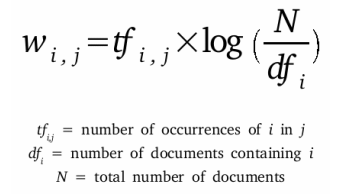

In [46]:
Image("img/tfidf.png", width=400, height=400)

Example:

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [65]:
docs = [' test Tokenize Words!',
        ' test This is the corpus~~~~~',
        'test Use Kears Tokenize?!@#',
        'test test test test...',
        '  ']

encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print('   test', 'tokenize', 'words', 'this' , 'is', 'the', 'corpus', 'use', 'kears')
print(encoded_docs)

   test tokenize words this is the corpus use kears
[[0.         0.69314718 0.98082925 1.25276297 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.69314718 0.         0.         1.25276297 1.25276297
  1.25276297 1.25276297 0.         0.        ]
 [0.         0.69314718 0.98082925 0.         0.         0.
  0.         0.         1.25276297 1.25276297]
 [0.         1.65405321 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


## 1.3 Word Embedding.


Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.
<b> Use vector to represent word. 
    
### Why Learn Word Embeddings?

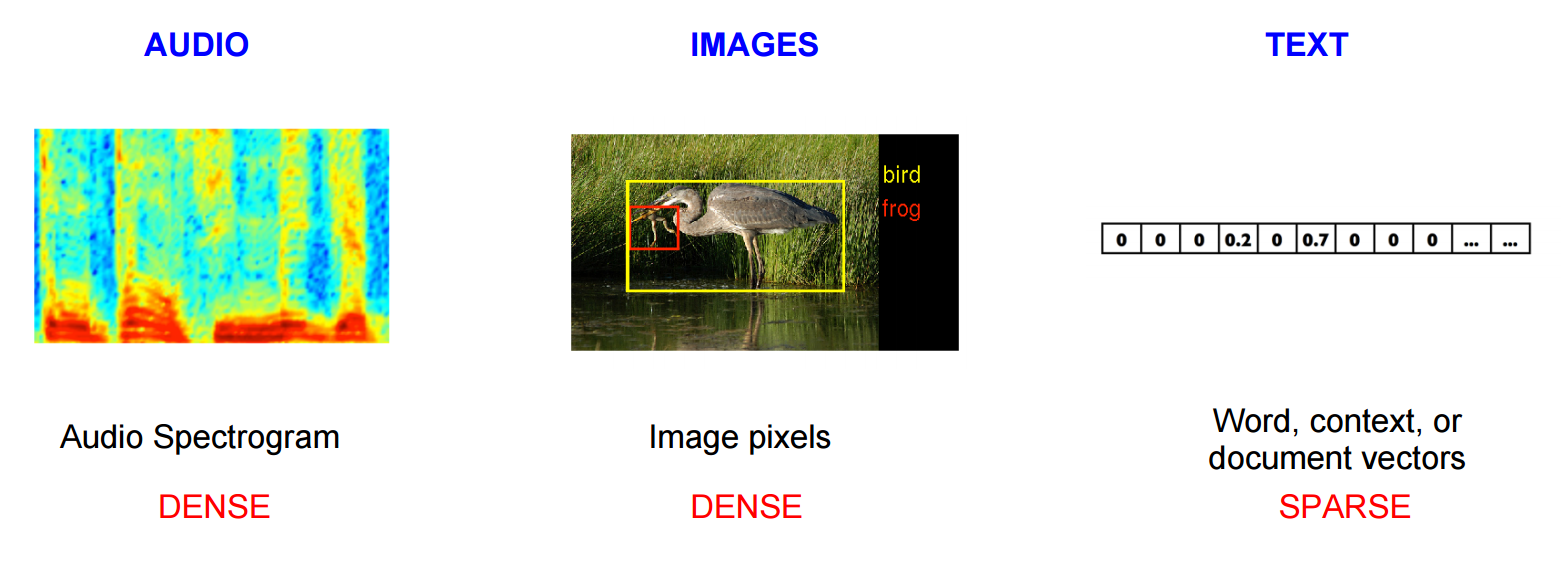

In [9]:
Image("img/audio-image-text.png", width=850)

Image and audio processing systems work with rich, high-dimensional datasets encoded as vectors of the individual raw pixel-intensities for image data, or e.g. power spectral density coefficients for audio data.
<b>However, natural language processing systems traditionally treat words as discrete atomic symbols

Vector space models (VSMs) represent (embed) words in a continuous vector space where semantically similar words are mapped to nearby points ('are embedded nearby each other').

### word2vec

Word2vec is similar to an autoencoder, encoding each word in a vector, but rather than training against the input words through reconstruction, <b>word2vec trains words against other words that neighbor them in the input corpus.</b>
    
It does so in one of <b>two ways</b>, either using context to predict a target word (a method known as continuous bag of words, or CBOW), or using a word to predict a target context, which is called skip-gram. <b>We use the latter method because it produces more accurate results on large datasets.

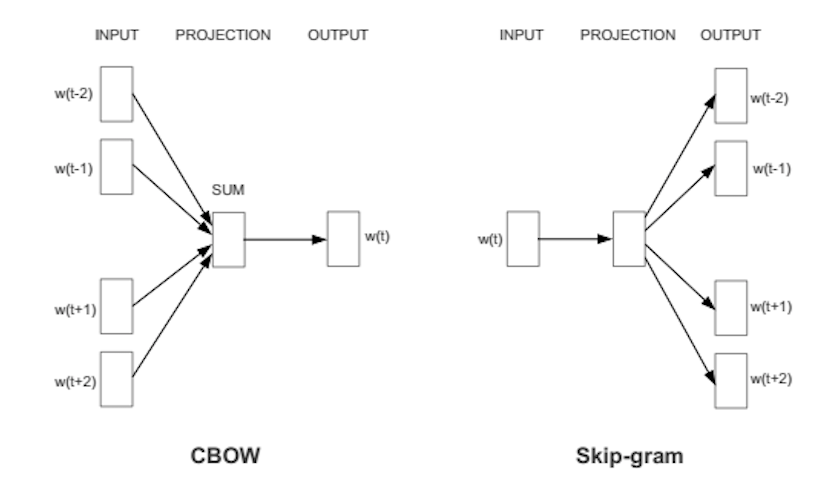

In [11]:
Image("img/word2vec_diagrams.png", width=600)

first let's read a document

In [66]:
# read txt file
def readtxt(filename):    
    with open(filename, 'r',encoding='gb18030', errors='ignore') as file_to_read:
        content = file_to_read.read()
    return content

In [67]:
doc_dir='bbcsport//football//001.txt'
doc=readtxt(doc_dir)
doc

'Man Utd stroll to Cup win\n\nWayne Rooney made a winning return to Everton as Manchester United cruised into the FA Cup quarter-finals.\n\nRooney received a hostile reception, but goals in each half from Quinton Fortune and Cristiano Ronaldo silenced the jeers at Goodison Park. Fortune headed home after 23 minutes before Ronaldo scored when Nigel Martyn parried Paul Scholes\' free-kick. Marcus Bent missed Everton\'s best chance when Roy Carroll, who was later struck by a missile, saved at his feet.\n\nRooney\'s return was always going to be a potential flashpoint, and he was involved in an angry exchange with a spectator even before kick-off. And Rooney\'s every touch was met with a deafening chorus of jeers from the crowd that once idolised the 19-year-old. Everton started brightly and Fortune needed to be alert to scramble away a header from Bent near the goal-line. But that was the cue for United to take complete control with a supreme passing display on a Goodison Park pitch that 